<a href="https://colab.research.google.com/github/Nahidjc/Al_Lab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/taitanic.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Ticket,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
from matplotlib import pyplot as plt

In [7]:
def bar_chart(feature):
  survived = dataset[dataset['Survived']==1][feature].value_counts()
  dead =  dataset[dataset['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index =['Survived','Dead']
  df.plot(kind='bar', stacked=True,figsize=(10,5))

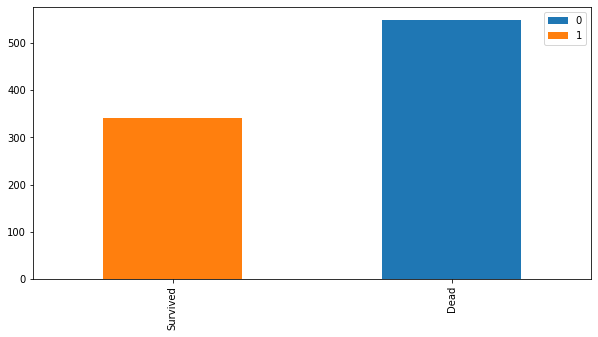

In [8]:
bar_chart('Survived')

In [9]:
train_data = [dataset]
for train in train_data :
  train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.',expand=False )

In [10]:

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Ticket,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Lady          1
Don           1
Mme           1
Capt          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [12]:
dataset.drop('Name',axis=1,inplace=True)

In [13]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,Ticket,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Lady          1
Don           1
Mme           1
Capt          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [15]:
Title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Major":3,"Col":3,"Mlle":3,"Lady":3,"Sir":3,"Jonkheer":3,"Mme":3,"Countess":3,"Don":3,"Ms":3,"Capt":3}

In [16]:
train_data = [dataset]
for train in train_data:
   train['Title']=train['Title'].map(Title_mapping)

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,Ticket,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
Gender_mapping ={"male":0,"female":1}

In [19]:
for train in train_data:
   train['Sex']=train['Sex'].map(Gender_mapping)

In [20]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,Ticket,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"),inplace=True)

In [22]:
dataset.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [23]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [24]:
embarked_mapping={"S":0,"C":1,"Q":2}


In [25]:
for data in train_data:
  data["Embarked"]=data["Embarked"].map(embarked_mapping)

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,Ticket,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [27]:
feature_drop=['Ticket',"Fare","Cabin"]
dataset=dataset.drop(feature_drop,axis=1)

In [28]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,0,0
1,2,1,1,1,38.0,1,0,1,2
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,2
4,5,0,3,0,35.0,0,0,0,0


In [29]:
train_data = dataset.drop('Survived',axis=1)
target = dataset['Survived']
train_data.shape

(891, 8)

In [30]:
target.shape

(891,)

In [31]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(train_data,target,test_size=0.2,random_state =42)

In [32]:
print("X_Train",x_train.shape)
print("X_Test",x_test.shape)
print("y_Train",y_train.shape)
print("Y_Test",y_test.shape)
print(y_test)


X_Train (712, 8)
X_Test (179, 8)
y_Train (712,)
Y_Test (179,)
709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [33]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
Title            int64
dtype: object

In [34]:
dataset['Age']=dataset['Age'].astype(int)


In [35]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Title          0
dtype: int64

In [36]:
dataset['Embarked']=dataset['Embarked'].astype(int)

In [39]:
train_data = dataset.drop('Survived',axis=1)
target = dataset['Survived']
train_data.shape


(891, 8)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,target,test_size=0.2,random_state=42)
print("X_Train",x_train.shape)
print("X_Test",x_test.shape)


X_Train (712, 8)
X_Test (179, 8)


In [43]:
dataset.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Embarked       int64
Title          int64
dtype: object

In [44]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Title          0
dtype: int64

In [45]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22,1,0,0,0
1,2,1,1,1,38,1,0,1,2
2,3,1,3,1,26,0,0,0,1
3,4,1,1,1,35,1,0,0,2
4,5,0,3,0,35,0,0,0,0
